In [8]:
%%html
<style>
@font-face {
    font-family: Vazir;
    src: url('Vazir.eot');
    src: url('Vazir.eot?#iefix') format('embedded-opentype'),
         url('Vazir.woff2') format('woff2'),
         url('Vazir.woff') format('woff'),
         url('Vazir.ttf') format('truetype');
    font-weight: normal;
    font-style: normal;
}
.farsi{
    font-family:Vazir;
    direction: rtl;
    #font-size:26px;
}
.center{
    text-align: center;
}
</style>
<script>
    //$('div.input').hide();
</script>

# <div class="farsi center">بسم الله الرحمن الرحیم</div>

In [2]:
import pandas as pd
from sklearn import datasets, svm, metrics

from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

In [3]:
MNIST_LENGTH = 28
train_label = pd.read_csv('MNIST/train_label.csv',header=None)
train_data  = pd.read_csv('MNIST/train_data.csv' ,header=None)
test_label  = pd.read_csv('MNIST/test_label.csv' ,header=None)
test_data   = pd.read_csv('MNIST/test_data.csv'  ,header=None)
np_test_label = np.array(test_label[0].values)

In [4]:
def vector_to_arr(img_vec):
    return np.array([img_vec[i*MNIST_LENGTH:(i+1)*MNIST_LENGTH]for i in range(MNIST_LENGTH)]).T.tolist()
def print_img(img_arr):
    img = Image.new( 'RGB', (MNIST_LENGTH,MNIST_LENGTH))
    pixels = img.load()
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            pixels[i,j] = (img_arr[i][j],img_arr[i][j],img_arr[i][j])
    imshow(np.asarray(img))
def calc_grade(perdicts):
    np_perdicts = np.array(perdicts)
    return np.count_nonzero(np_perdicts==np_test_label)/len(np_test_label)

4


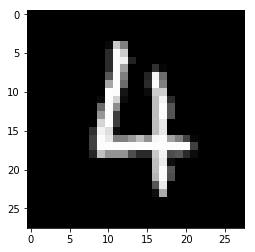

In [5]:
i = 934
print_img(vector_to_arr(train_data.values[i]))
print(train_label.values[i][0])

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(26)
knc.fit(train_data.values,train_label[0].values)
perdicted = knc.predict(test_data.values)
print(calc_grade(perdicted))

0.87
